In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

In [2]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])
# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

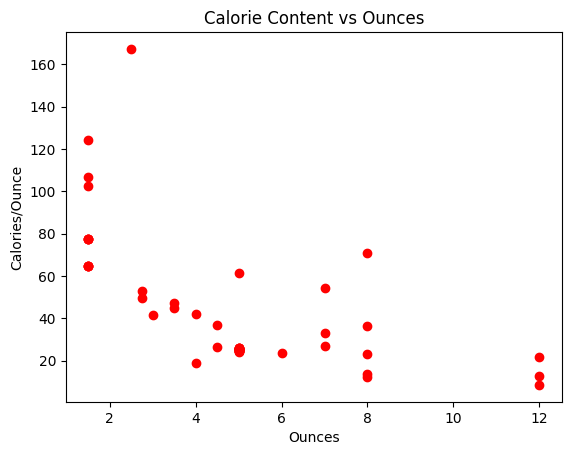

In [34]:
fig,ax = plt.subplots();
scatt_plot = ax.plot(oz,cal_per_ounce,"ro");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');

In [5]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*x**2+b*x+c

In [14]:
lcoef,lcovar=curve_fit(arb_linear, oz, cal_per_ounce)
qcoef,qcovar=curve_fit(arb_quad, oz, cal_per_ounce)
print("%s+(%s)x"%(lcoef[1],lcoef[0]))

78.48637415598286+(-7.213475459328503)x


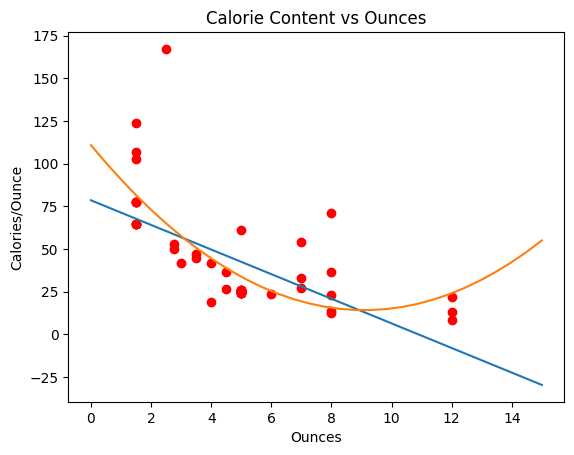

In [35]:
x=np.linspace(0,15,30)
line_approx = ax.plot(x,lcoef[0]*x+lcoef[1]);
quad_approx = ax.plot(x,qcoef[0]*x**2+qcoef[1]*x+qcoef[2]);
fig

In [66]:
def l(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = (y-yp)**2
    n=x.shape[0]
    return 1/n*sum(dy)
def dml(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = y-yp
    n=x.shape[0]
    return 2/n*sum(dy*(-x))
def dbl(x,y,m,b):
    yp = m*x+b
    dy = y-yp
    n=x.shape[0]
    return -2/n*sum(dy)

In [67]:
m = [1]
b = [0]
x = oz
y = cal_per_ounce
eta = 0.01
for i in range(2000):
    m.append(m[i]-eta*dml(x,y,m[i],b[i]))
    b.append(b[i]-eta*dbl(x,y,m[i],b[i]))
print("%s+(%s)x"%(b[i],m[i]))


78.47793049368995+(-7.212116546880378)x


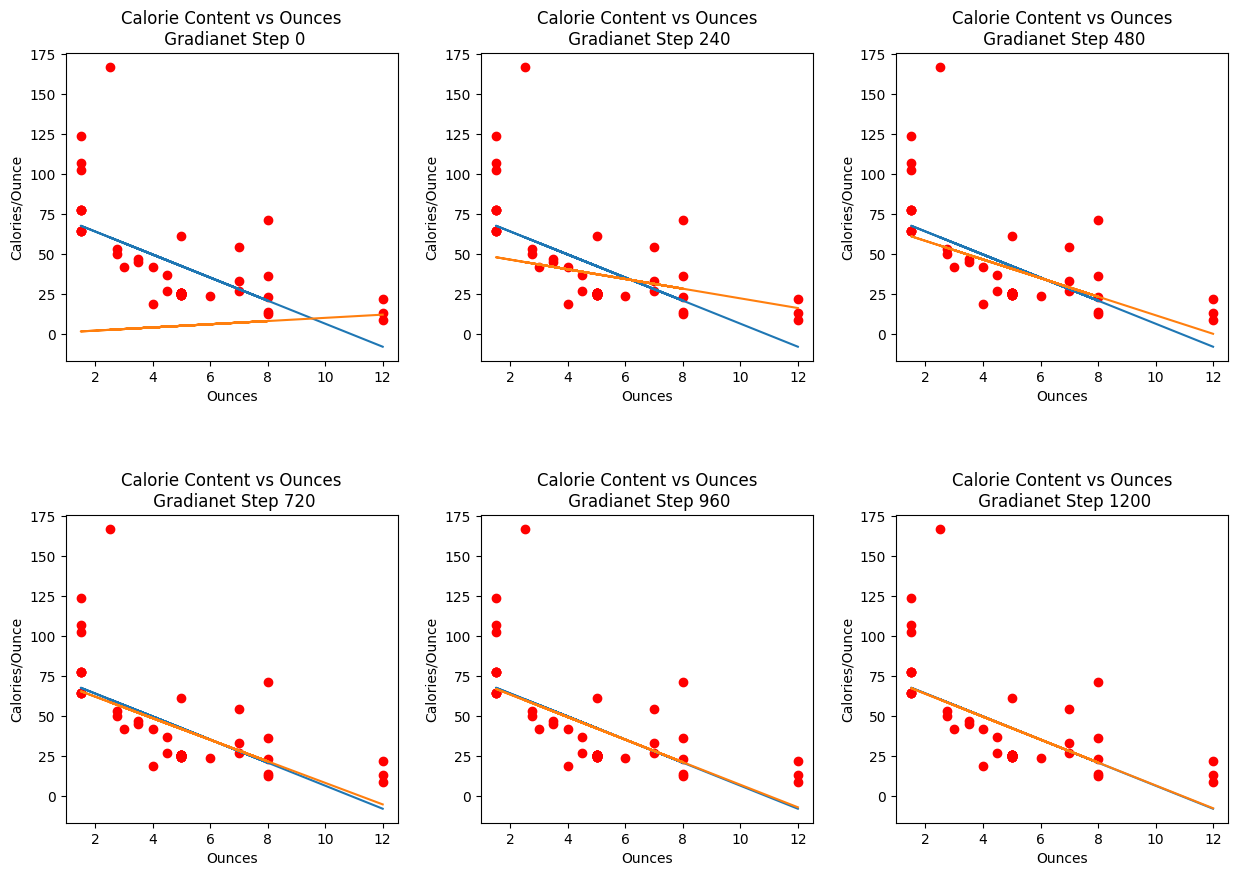

In [73]:
fig2,ax2 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig2.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        n=(col+3*row)*(1200//5)
        ax2[row,col].plot(oz,cal_per_ounce,"ro");
        ax2[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax2[row,col].set_xlabel('Ounces');
        ax2[row,col].set_ylabel('Calories/Ounce');
        ax2[row,col].plot(x,lcoef[0]*x+lcoef[1]);
        ax2[row,col].plot(x,m[n]*x+b[n]);